# Edge Detection

We will use the **Canny Edge Detector** algorithm for this task.

## How It Works

- Apply's Gaussian filter to smooth;
- Find intesity gradients in the image;
- Apply non-maximum supression;
- Apply double threshold;

__Obs:__ For high res. images you should **apply a custom blur** before Canny algorithm.



In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Basic Usage

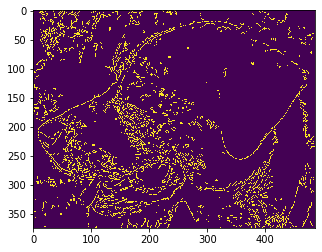

In [4]:
img = cv.imread("../assets/sammy_face.jpg");

threshold_1 = 150
threshold_2 = 255

edges = cv.Canny(img, threshold_1, threshold_2)
plt.imshow(edges)

## Complex Usage
### Medium calculated the threshold

In [9]:
def calc_median_threshold(img, lower_bias=0, upper_bias=0):
    medium_pixel_value = np.median(img)
    lower = int(max(0, 0.7*medium_pixel_value) + lower_bias)
    upper = int(min(255, 1.3*medium_pixel_value) + upper_bias)
    return lower, upper

In [51]:
img = cv.imread("../assets/sammy_face.jpg");

threshold_1, threshold_2 = calc_median_threshold(img,upper_bias=75)

### Blur the image

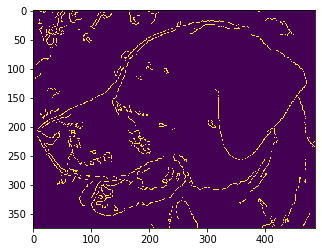

In [53]:
blur_img = cv.blur(img, ksize=(5,5))

edges = cv.Canny(blur_img, threshold_1, threshold_2)
plt.imshow(edges)

## Examples
### The screw's nut

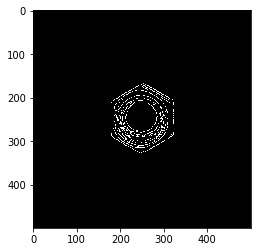

In [223]:
img = cv.imread('../assets/porca_frontal.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img = cv.resize(img, (500, 500)) # Lower the size
# 
# Blur
blur_ksize=(5,5)
blur_img = cv.blur(img, blur_ksize)
# 
# Detecting Edges
threshold_1 = 15
threshold_2 = 35
edges = cv.Canny(blur_img, threshold_1, threshold_2)
plt.imshow(edges, cmap="gray")

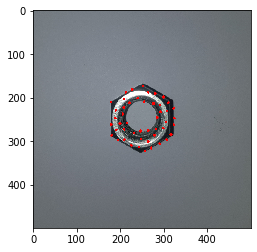

In [224]:

# Detecting Corner
max_corners = 0
quality_level = 0.01
min_distance = 15

corners = cv.goodFeaturesToTrack(edges, max_corners, quality_level,min_distance)
# Showing
img_copy = img.copy();
corners = np.int0(corners)

for corner in corners:
    x, y = corner.ravel()
    cv.circle(img_copy, (x,y), 3, (255,0,0), -1)
    
plt.imshow(img_copy)